## Wrangling and Analyzing the Tweet Archive of " We Rate Dogs" Twitter Account 

## Project Done By : Reem Alashhab 

### What is "We Rate Dogs"  Twitter Account ?

It is a Twitter account that rates people's dogs with a humorous comment about the dog. It started in 2015 by the college student Matt Nelson, and has received international media coverage both for its popularity and for the attention drawn to social media copyright law when it was suspended by Twitter.

### Introduction 

In this project, I will work on wrangling the WeRateDogs Twitter data set to create interesting and trustworthy analysis and visualizations through the three steps of data wrangling:

* Gathering Data.
* Assessing Data.
* Cleaning Data.

### Project Requirments

* Installing Jupyter Notebook.

* Getting consumer_key, consumer_secret, access_token, access_secret to get more data about "We Rate Dogs" twitter account from Twitter API.

* Installing the following libraries : 

1. Numpy.
2. Pandas.
3. Requests.
4. Json.
5. Matplotlib.pyplot.
6. Tweepy.
7. Seaborn.
8. Warnings.
9. Csv.
10. Os
11. Sys.
12. Time.
13. Counter.collections.

### Project Files 

* twitter-archive-enhanced.csv: file that includes the tweets related to "We Rate Dogs" given by Udacity.
* image_prediction.tsv: file downloaded programmatically using Requests library.
* tweet_json.txt: data set gathered from the twitter API.
* twitter_addinfo.csv: Data set with specified columns extracted from the tweet_json.txt file.

* image-predictions-clean.tsv : file used in the wrangling process of the image predictions data set.
* image_predictions_clean_final.csv : the final data set of image predictions after the wrangling and cleaning process.
* nodata_ids.txt : file that contains tweet_ids for not found tweets after the data gathering from twitter API.
* twitter-archive-enhanced-clean.csv : file used in the wrangling process of the twitter archive enhanced data set.
* twitter_arch_clean_final.csv : the final data set of twitter archive enhanced data set after the wrangling and cleaning    process. 
* twitter_addinfo_clean.csv : the file used in the wrangling process of the gathered twitter data from the twitter API.
* twitter_addinfo_clean_final.csv : the final data set of the gathered twitter data from the twitter API after the wrangling and cleaning process. 
* twitter_archive_master.csv: the final master data set with all data combined from the three main data sets.
* act_report: documentation of analysis and insights of the final master data set.
* wrangle_act.ipynb: the main project coding file that contains all the wrangling and visualization of data.
* wrangle_report: File that describes in words the data wrangling steps: gather, assess, and clean.

### Table of Content 

* Gathering Data.
* Assessing Data.
* Cleaning Data.
* Data Analysis and Visualizations.


### Gathering Data :

Gathering data is the first step in the data wrangling process. It invloves :

* Obtaining data (downloading a file from the internet, scraping a web page, querying an API, etc.)
* Importing that data into a programming environment (e.g. Jupyter Notebook).

In [3]:
# importing some python libraries required 
# through all the data analysis for the selected data sets
import pandas as pd
import numpy as np
import requests
import tweepy 
import json 
import sys
import time
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [105]:
# importing"WeRateDogs" twitter archive from the directry into a panda dataframe
twitter_arch = pd.read_csv("twitter-archive-enhanced.csv")

# importing programmatically the tweet image predctions for "WeRateDogs" twitter account
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# creating a file for tweet image predctions in the current directory   
with open(os.path.join("",url.split("/")[-1]), mode = "wb") as file:
    file.write(response.content)    

# creating a panda data frame for tweet image predictions data set
image_pred = pd.read_csv("image-predictions.tsv", sep = "\t")


In [20]:
# checking to see of the file is imported correclty
# displaying the first four rows of the data set
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# checking to see of the file is imported correclty
# displaying the first five rows of the data set
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# creating an API object to gather additional Twitter Data
# all keys and tokens were removed for the purpose of keeping the project researcher data private
consumer_key = ""

consumer_secret = ""

access_token = ""

access_secret = ""


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
                        
auth.set_access_token(access_token, access_secret)

# setting the the time limit to not overload the Twitter server and get blocked
api = tweepy.API(auth, wait_on_rate_limit = True)



# setting a timer to check the time per tweet retrieve
start = time.time()

# creating a list for tweets ids to use them to retrive data
tweets_ids = []

# creating a list for tweets ids that have no data found
nodata_ids = []

# setting a counter for each tweet id
count = 0

# setting a counter for found tweets ids

found_ids = 0

# setting a counter for not found tweets ids

notfound_ids = 0



# adding the tweets ids to the list 

for index, row in twitter_arch.iterrows():
    
    tweets_ids.append(row[0])
    
# using the tweets ids to retrive data from Twitter API

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweets_ids : 
        
        try: 
            
            # if there is data for this tweet id, add data to a txt file       
            tweet = api.get_status(tweet_id, tweet_mode ="extended")      
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            # print success message
            print("Scuess to get tweet data")
            # increase found_ids counter
            found_ids+=1          
            
        
        except:
        
            # if failed to get data for this tweet id
            # add it to nodata_ids dictionary
            nodata_ids.append(tweet_id)
            # print fail message
            print("Failed to get tweet data")
            notfound_ids+=1
        
        # increasing the counter by 1     
        count +=1 
        # print the counter number
        print("The tweet ID count now is : "+str(count))
        
# displaying finishing messages   
end = time.time()  
print("The process is finished !")
print("The total number of found tweets ids is : "+str(found_ids))
print("The total number of not found tweet ids is : "+str(notfound_ids))
print("The total time is : "+str((end - start)/60)+" minutes ")


Scuess to get tweet data
The tweet ID count now is : 1
Scuess to get tweet data
The tweet ID count now is : 2
Scuess to get tweet data
The tweet ID count now is : 3
Scuess to get tweet data
The tweet ID count now is : 4
Scuess to get tweet data
The tweet ID count now is : 5
Scuess to get tweet data
The tweet ID count now is : 6
Scuess to get tweet data
The tweet ID count now is : 7
Scuess to get tweet data
The tweet ID count now is : 8
Scuess to get tweet data
The tweet ID count now is : 9
Scuess to get tweet data
The tweet ID count now is : 10
Scuess to get tweet data
The tweet ID count now is : 11
Scuess to get tweet data
The tweet ID count now is : 12
Scuess to get tweet data
The tweet ID count now is : 13
Scuess to get tweet data
The tweet ID count now is : 14
Scuess to get tweet data
The tweet ID count now is : 15
Scuess to get tweet data
The tweet ID count now is : 16
Scuess to get tweet data
The tweet ID count now is : 17
Scuess to get tweet data
The tweet ID count now is : 18
S

Scuess to get tweet data
The tweet ID count now is : 147
Scuess to get tweet data
The tweet ID count now is : 148
Scuess to get tweet data
The tweet ID count now is : 149
Scuess to get tweet data
The tweet ID count now is : 150
Scuess to get tweet data
The tweet ID count now is : 151
Scuess to get tweet data
The tweet ID count now is : 152
Scuess to get tweet data
The tweet ID count now is : 153
Scuess to get tweet data
The tweet ID count now is : 154
Scuess to get tweet data
The tweet ID count now is : 155
Failed to get tweet data
The tweet ID count now is : 156
Scuess to get tweet data
The tweet ID count now is : 157
Scuess to get tweet data
The tweet ID count now is : 158
Scuess to get tweet data
The tweet ID count now is : 159
Scuess to get tweet data
The tweet ID count now is : 160
Scuess to get tweet data
The tweet ID count now is : 161
Scuess to get tweet data
The tweet ID count now is : 162
Scuess to get tweet data
The tweet ID count now is : 163
Scuess to get tweet data
The tw

Scuess to get tweet data
The tweet ID count now is : 291
Scuess to get tweet data
The tweet ID count now is : 292
Scuess to get tweet data
The tweet ID count now is : 293
Scuess to get tweet data
The tweet ID count now is : 294
Scuess to get tweet data
The tweet ID count now is : 295
Scuess to get tweet data
The tweet ID count now is : 296
Scuess to get tweet data
The tweet ID count now is : 297
Scuess to get tweet data
The tweet ID count now is : 298
Failed to get tweet data
The tweet ID count now is : 299
Scuess to get tweet data
The tweet ID count now is : 300
Scuess to get tweet data
The tweet ID count now is : 301
Scuess to get tweet data
The tweet ID count now is : 302
Scuess to get tweet data
The tweet ID count now is : 303
Scuess to get tweet data
The tweet ID count now is : 304
Scuess to get tweet data
The tweet ID count now is : 305
Scuess to get tweet data
The tweet ID count now is : 306
Scuess to get tweet data
The tweet ID count now is : 307
Scuess to get tweet data
The tw

Scuess to get tweet data
The tweet ID count now is : 435
Scuess to get tweet data
The tweet ID count now is : 436
Scuess to get tweet data
The tweet ID count now is : 437
Scuess to get tweet data
The tweet ID count now is : 438
Scuess to get tweet data
The tweet ID count now is : 439
Scuess to get tweet data
The tweet ID count now is : 440
Scuess to get tweet data
The tweet ID count now is : 441
Scuess to get tweet data
The tweet ID count now is : 442
Scuess to get tweet data
The tweet ID count now is : 443
Scuess to get tweet data
The tweet ID count now is : 444
Scuess to get tweet data
The tweet ID count now is : 445
Scuess to get tweet data
The tweet ID count now is : 446
Scuess to get tweet data
The tweet ID count now is : 447
Scuess to get tweet data
The tweet ID count now is : 448
Scuess to get tweet data
The tweet ID count now is : 449
Scuess to get tweet data
The tweet ID count now is : 450
Scuess to get tweet data
The tweet ID count now is : 451
Scuess to get tweet data
The tw

Scuess to get tweet data
The tweet ID count now is : 579
Scuess to get tweet data
The tweet ID count now is : 580
Scuess to get tweet data
The tweet ID count now is : 581
Scuess to get tweet data
The tweet ID count now is : 582
Scuess to get tweet data
The tweet ID count now is : 583
Scuess to get tweet data
The tweet ID count now is : 584
Scuess to get tweet data
The tweet ID count now is : 585
Scuess to get tweet data
The tweet ID count now is : 586
Scuess to get tweet data
The tweet ID count now is : 587
Scuess to get tweet data
The tweet ID count now is : 588
Scuess to get tweet data
The tweet ID count now is : 589
Scuess to get tweet data
The tweet ID count now is : 590
Scuess to get tweet data
The tweet ID count now is : 591
Scuess to get tweet data
The tweet ID count now is : 592
Scuess to get tweet data
The tweet ID count now is : 593
Scuess to get tweet data
The tweet ID count now is : 594
Scuess to get tweet data
The tweet ID count now is : 595
Scuess to get tweet data
The tw

Scuess to get tweet data
The tweet ID count now is : 723
Scuess to get tweet data
The tweet ID count now is : 724
Scuess to get tweet data
The tweet ID count now is : 725
Scuess to get tweet data
The tweet ID count now is : 726
Scuess to get tweet data
The tweet ID count now is : 727
Scuess to get tweet data
The tweet ID count now is : 728
Scuess to get tweet data
The tweet ID count now is : 729
Scuess to get tweet data
The tweet ID count now is : 730
Scuess to get tweet data
The tweet ID count now is : 731
Scuess to get tweet data
The tweet ID count now is : 732
Scuess to get tweet data
The tweet ID count now is : 733
Scuess to get tweet data
The tweet ID count now is : 734
Scuess to get tweet data
The tweet ID count now is : 735
Scuess to get tweet data
The tweet ID count now is : 736
Scuess to get tweet data
The tweet ID count now is : 737
Scuess to get tweet data
The tweet ID count now is : 738
Scuess to get tweet data
The tweet ID count now is : 739
Scuess to get tweet data
The tw

Scuess to get tweet data
The tweet ID count now is : 868
Scuess to get tweet data
The tweet ID count now is : 869
Scuess to get tweet data
The tweet ID count now is : 870
Scuess to get tweet data
The tweet ID count now is : 871
Scuess to get tweet data
The tweet ID count now is : 872
Scuess to get tweet data
The tweet ID count now is : 873
Scuess to get tweet data
The tweet ID count now is : 874
Scuess to get tweet data
The tweet ID count now is : 875
Scuess to get tweet data
The tweet ID count now is : 876
Scuess to get tweet data
The tweet ID count now is : 877
Scuess to get tweet data
The tweet ID count now is : 878
Scuess to get tweet data
The tweet ID count now is : 879
Scuess to get tweet data
The tweet ID count now is : 880
Scuess to get tweet data
The tweet ID count now is : 881
Scuess to get tweet data
The tweet ID count now is : 882
Scuess to get tweet data
The tweet ID count now is : 883
Scuess to get tweet data
The tweet ID count now is : 884
Scuess to get tweet data
The tw

Scuess to get tweet data
The tweet ID count now is : 1012
Scuess to get tweet data
The tweet ID count now is : 1013
Scuess to get tweet data
The tweet ID count now is : 1014
Scuess to get tweet data
The tweet ID count now is : 1015
Scuess to get tweet data
The tweet ID count now is : 1016
Scuess to get tweet data
The tweet ID count now is : 1017
Scuess to get tweet data
The tweet ID count now is : 1018
Scuess to get tweet data
The tweet ID count now is : 1019
Scuess to get tweet data
The tweet ID count now is : 1020
Scuess to get tweet data
The tweet ID count now is : 1021
Scuess to get tweet data
The tweet ID count now is : 1022
Scuess to get tweet data
The tweet ID count now is : 1023
Scuess to get tweet data
The tweet ID count now is : 1024
Scuess to get tweet data
The tweet ID count now is : 1025
Scuess to get tweet data
The tweet ID count now is : 1026
Scuess to get tweet data
The tweet ID count now is : 1027
Scuess to get tweet data
The tweet ID count now is : 1028
Scuess to get 

Scuess to get tweet data
The tweet ID count now is : 1154
Scuess to get tweet data
The tweet ID count now is : 1155
Scuess to get tweet data
The tweet ID count now is : 1156
Scuess to get tweet data
The tweet ID count now is : 1157
Scuess to get tweet data
The tweet ID count now is : 1158
Scuess to get tweet data
The tweet ID count now is : 1159
Scuess to get tweet data
The tweet ID count now is : 1160
Scuess to get tweet data
The tweet ID count now is : 1161
Scuess to get tweet data
The tweet ID count now is : 1162
Scuess to get tweet data
The tweet ID count now is : 1163
Scuess to get tweet data
The tweet ID count now is : 1164
Scuess to get tweet data
The tweet ID count now is : 1165
Scuess to get tweet data
The tweet ID count now is : 1166
Scuess to get tweet data
The tweet ID count now is : 1167
Scuess to get tweet data
The tweet ID count now is : 1168
Scuess to get tweet data
The tweet ID count now is : 1169
Scuess to get tweet data
The tweet ID count now is : 1170
Scuess to get 

Scuess to get tweet data
The tweet ID count now is : 1297
Scuess to get tweet data
The tweet ID count now is : 1298
Scuess to get tweet data
The tweet ID count now is : 1299
Scuess to get tweet data
The tweet ID count now is : 1300
Scuess to get tweet data
The tweet ID count now is : 1301
Scuess to get tweet data
The tweet ID count now is : 1302
Scuess to get tweet data
The tweet ID count now is : 1303
Scuess to get tweet data
The tweet ID count now is : 1304
Scuess to get tweet data
The tweet ID count now is : 1305
Scuess to get tweet data
The tweet ID count now is : 1306
Scuess to get tweet data
The tweet ID count now is : 1307
Scuess to get tweet data
The tweet ID count now is : 1308
Scuess to get tweet data
The tweet ID count now is : 1309
Scuess to get tweet data
The tweet ID count now is : 1310
Scuess to get tweet data
The tweet ID count now is : 1311
Scuess to get tweet data
The tweet ID count now is : 1312
Scuess to get tweet data
The tweet ID count now is : 1313
Scuess to get 

Scuess to get tweet data
The tweet ID count now is : 1439
Scuess to get tweet data
The tweet ID count now is : 1440
Scuess to get tweet data
The tweet ID count now is : 1441
Scuess to get tweet data
The tweet ID count now is : 1442
Scuess to get tweet data
The tweet ID count now is : 1443
Scuess to get tweet data
The tweet ID count now is : 1444
Scuess to get tweet data
The tweet ID count now is : 1445
Scuess to get tweet data
The tweet ID count now is : 1446
Scuess to get tweet data
The tweet ID count now is : 1447
Scuess to get tweet data
The tweet ID count now is : 1448
Scuess to get tweet data
The tweet ID count now is : 1449
Scuess to get tweet data
The tweet ID count now is : 1450
Scuess to get tweet data
The tweet ID count now is : 1451
Scuess to get tweet data
The tweet ID count now is : 1452
Scuess to get tweet data
The tweet ID count now is : 1453
Scuess to get tweet data
The tweet ID count now is : 1454
Scuess to get tweet data
The tweet ID count now is : 1455
Scuess to get 

Scuess to get tweet data
The tweet ID count now is : 1581
Scuess to get tweet data
The tweet ID count now is : 1582
Scuess to get tweet data
The tweet ID count now is : 1583
Scuess to get tweet data
The tweet ID count now is : 1584
Scuess to get tweet data
The tweet ID count now is : 1585
Scuess to get tweet data
The tweet ID count now is : 1586
Scuess to get tweet data
The tweet ID count now is : 1587
Scuess to get tweet data
The tweet ID count now is : 1588
Scuess to get tweet data
The tweet ID count now is : 1589
Scuess to get tweet data
The tweet ID count now is : 1590
Scuess to get tweet data
The tweet ID count now is : 1591
Scuess to get tweet data
The tweet ID count now is : 1592
Scuess to get tweet data
The tweet ID count now is : 1593
Scuess to get tweet data
The tweet ID count now is : 1594
Scuess to get tweet data
The tweet ID count now is : 1595
Scuess to get tweet data
The tweet ID count now is : 1596
Scuess to get tweet data
The tweet ID count now is : 1597
Scuess to get 

Scuess to get tweet data
The tweet ID count now is : 1724
Scuess to get tweet data
The tweet ID count now is : 1725
Scuess to get tweet data
The tweet ID count now is : 1726
Failed to get tweet data
The tweet ID count now is : 1727
Scuess to get tweet data
The tweet ID count now is : 1728
Scuess to get tweet data
The tweet ID count now is : 1729
Scuess to get tweet data
The tweet ID count now is : 1730
Scuess to get tweet data
The tweet ID count now is : 1731
Scuess to get tweet data
The tweet ID count now is : 1732
Scuess to get tweet data
The tweet ID count now is : 1733
Scuess to get tweet data
The tweet ID count now is : 1734
Scuess to get tweet data
The tweet ID count now is : 1735
Scuess to get tweet data
The tweet ID count now is : 1736
Scuess to get tweet data
The tweet ID count now is : 1737
Scuess to get tweet data
The tweet ID count now is : 1738
Scuess to get tweet data
The tweet ID count now is : 1739
Scuess to get tweet data
The tweet ID count now is : 1740
Scuess to get 

Scuess to get tweet data
The tweet ID count now is : 1867
Scuess to get tweet data
The tweet ID count now is : 1868
Scuess to get tweet data
The tweet ID count now is : 1869
Scuess to get tweet data
The tweet ID count now is : 1870
Scuess to get tweet data
The tweet ID count now is : 1871
Scuess to get tweet data
The tweet ID count now is : 1872
Scuess to get tweet data
The tweet ID count now is : 1873
Scuess to get tweet data
The tweet ID count now is : 1874
Scuess to get tweet data
The tweet ID count now is : 1875
Scuess to get tweet data
The tweet ID count now is : 1876
Scuess to get tweet data
The tweet ID count now is : 1877
Scuess to get tweet data
The tweet ID count now is : 1878
Scuess to get tweet data
The tweet ID count now is : 1879
Scuess to get tweet data
The tweet ID count now is : 1880
Scuess to get tweet data
The tweet ID count now is : 1881
Scuess to get tweet data
The tweet ID count now is : 1882
Scuess to get tweet data
The tweet ID count now is : 1883
Scuess to get 

Scuess to get tweet data
The tweet ID count now is : 2009
Scuess to get tweet data
The tweet ID count now is : 2010
Scuess to get tweet data
The tweet ID count now is : 2011
Scuess to get tweet data
The tweet ID count now is : 2012
Scuess to get tweet data
The tweet ID count now is : 2013
Scuess to get tweet data
The tweet ID count now is : 2014
Scuess to get tweet data
The tweet ID count now is : 2015
Scuess to get tweet data
The tweet ID count now is : 2016
Scuess to get tweet data
The tweet ID count now is : 2017
Scuess to get tweet data
The tweet ID count now is : 2018
Scuess to get tweet data
The tweet ID count now is : 2019
Scuess to get tweet data
The tweet ID count now is : 2020
Scuess to get tweet data
The tweet ID count now is : 2021
Scuess to get tweet data
The tweet ID count now is : 2022
Scuess to get tweet data
The tweet ID count now is : 2023
Scuess to get tweet data
The tweet ID count now is : 2024
Scuess to get tweet data
The tweet ID count now is : 2025
Scuess to get 

Scuess to get tweet data
The tweet ID count now is : 2152
Scuess to get tweet data
The tweet ID count now is : 2153
Scuess to get tweet data
The tweet ID count now is : 2154
Scuess to get tweet data
The tweet ID count now is : 2155
Scuess to get tweet data
The tweet ID count now is : 2156
Scuess to get tweet data
The tweet ID count now is : 2157
Scuess to get tweet data
The tweet ID count now is : 2158
Scuess to get tweet data
The tweet ID count now is : 2159
Scuess to get tweet data
The tweet ID count now is : 2160
Scuess to get tweet data
The tweet ID count now is : 2161
Scuess to get tweet data
The tweet ID count now is : 2162
Scuess to get tweet data
The tweet ID count now is : 2163
Scuess to get tweet data
The tweet ID count now is : 2164
Scuess to get tweet data
The tweet ID count now is : 2165
Scuess to get tweet data
The tweet ID count now is : 2166
Scuess to get tweet data
The tweet ID count now is : 2167
Scuess to get tweet data
The tweet ID count now is : 2168
Scuess to get 

Scuess to get tweet data
The tweet ID count now is : 2294
Scuess to get tweet data
The tweet ID count now is : 2295
Scuess to get tweet data
The tweet ID count now is : 2296
Scuess to get tweet data
The tweet ID count now is : 2297
Scuess to get tweet data
The tweet ID count now is : 2298
Scuess to get tweet data
The tweet ID count now is : 2299
Scuess to get tweet data
The tweet ID count now is : 2300
Scuess to get tweet data
The tweet ID count now is : 2301
Scuess to get tweet data
The tweet ID count now is : 2302
Scuess to get tweet data
The tweet ID count now is : 2303
Scuess to get tweet data
The tweet ID count now is : 2304
Scuess to get tweet data
The tweet ID count now is : 2305
Scuess to get tweet data
The tweet ID count now is : 2306
Scuess to get tweet data
The tweet ID count now is : 2307
Scuess to get tweet data
The tweet ID count now is : 2308
Scuess to get tweet data
The tweet ID count now is : 2309
Scuess to get tweet data
The tweet ID count now is : 2310
Scuess to get 

In [94]:
# preparing a dataframe for only specific data from the file   
twitter_add = pd.DataFrame(columns=['tweet_id','tweet_text','retweet_count',
                                    'favorite_count','text_range','created_at'])
with open('tweet_json.txt') as file:
    for line in file:
        data = json.loads(line)
        tweet_id = data['id_str']
        tweet_text = data['full_text']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        text_range = data['display_text_range']
        created_at = data['created_at']
        twitter_add = twitter_add.append(pd.DataFrame([[tweet_id,tweet_text,
                                                        retweet_count, favorite_count,
                                                        text_range, created_at]],
                                                        columns=['tweet_id','tweet_text',
                                                                 'retweet_count','favorite_count',
                                                                  'text_range','created_at']))                                                                     
twitter_add = twitter_add.reset_index(drop=True)



# adding the created data frame to a new txt file
with open('twitter_addinfo.csv', 'w') as file:
        # adding the tweets to the file
        twitter_add.to_csv(file, index = False)

In [104]:
# displaying the dataframe for twitter_add
twitter_add = pd.read_csv("twitter_addinfo.csv")
twitter_add.head()

,tweet_id,tweet_text,retweet_count,favorite_count,text_range,created_at
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8215,37684,"[0, 85]",Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,This is Tilly. She's just checking pup on you....,6076,32372,"[0, 138]",Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4017,24378,"[0, 121]",Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8370,41007,"[0, 79]",Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,This is Franklin. He would like you to stop ca...,9075,39208,"[0, 138]",Sat Jul 29 16:00:24 +0000 2017


In [11]:
# add all the not found tweets ids in a txt file for easier access 
# the column title
column_title = "nodata_ids\n"

# adding the nodata_ids in a txt file
with open('nodata_ids.txt', 'w') as file:
    # adding the column title to the file
    file.write(column_title)
    # itterate through the ids list
    for tweet_id in nodata_ids :
        # adding the tweets_ids to the file
        file.write(str(tweet_id))
        file.write('\n')

In [4]:
# checking the nodata_ids file 
nodata_ids = pd.read_csv("nodata_ids.txt")
nodata_ids

,nodata_ids
0,888202515573088257
1,873697596434513921
2,872668790621863937
3,872261713294495745
4,869988702071779329
5,866816280283807744
6,861769973181624320
7,845459076796616705
8,842892208864923648
9,837012587749474308


### Assessing Data :

After gathering data required for this project from multiple sources, the next step will be assessing these data. 
I will inspect the datasets for two things: data quality issues (i.e. content issues) and lack of tidiness (i.e structural issues) before moving into the cleaning phase.

In [14]:
# checking the twitter_arch data set 
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Observation:

In this data set, there are 2356 entries and 17 columns.


There are some missing columns data such as :

1. in_reply_to_status_id.
2. in_reply_to_user_id.
3. retweeted_status_id.
4. retweeted_status_user_id.
5. retweeted_status_timestamp.
6. expanded_urls.

**However, I will not need data for these columns in this project. So, they will not be considered a problem.**


On the other hand, the data for other columns are complete:

1. tweet_id.
2. timestamp
3. source.
4. text.
5. rating_numerator.
6. rating_denominator.
7. name.
8. doggo.
9. floofer.
10. pupper.
11. puppo.

**There is one problem found in the quality of data:**

The data type for tweet_id is (int) while it should be changed to (string) as I will not perform any 

mathmatical operation on this column.


In [8]:
# checking the twitter_arch data set
twitter_arch.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
# checking the twitter_arch data set
twitter_arch.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


#### Observation:

  
1. The name column needs to have a more meaningful name ex: dog_name.

2. The name column includes some false names values such as in 2346 and 2347 rows( ex: a , the, etc ); it seems that it was extracted wrongly. 

3. The three columns of ( doggo, floofer, pupper, and puppo ) needs to be joined to only one column to have a meaningful analysis. 

4. The text column needs to have a more meaningful name ex: tweet_text.



In [13]:
# checking the twitter_arch data set
twitter_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
2190,668960084974809088,NaN,NaN,2015-11-24 01:11:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jaycob. He got scared of the vacuum. Hide...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668960084...,10,10,Jaycob,None,None,None,None
1909,674422304705744896,NaN,NaN,2015-12-09 02:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She doesn't understand flowers. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674422304...,12,10,Ava,None,None,None,None
2210,668620235289837568,NaN,NaN,2015-11-23 02:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kallie. There was a tornado in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668620235...,10,10,Kallie,None,None,None,None
991,748699167502000129,NaN,NaN,2016-07-01 02:06:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tripp. He's being eaten by a sherk and do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748699167...,11,10,Tripp,None,None,None,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
849,766008592277377025,NaN,NaN,2016-08-17 20:27:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766008592...,11,10,Angel,None,None,None,None
692,787111942498508800,NaN,NaN,2016-10-15 02:04:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carl. He's very powerfu...,7.529324e+17,4.196984e+09,2016-07-12 18:27:35 +0000,"https://vine.co/v/OEppMFbejFz,https://vine.co/...",12,10,Carl,None,None,None,None
1550,689154315265683456,NaN,NaN,2016-01-18 18:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate birds but I feel bad co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689154315...,9,10,None,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


In [14]:
# checking the twitter_arch data set
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Observation:
1. The rating_numerator has a very high std (std = 45.88 ), which means there are maybe many outliers or wrong values.
   This will be checked further in an excel sheet.
2. The rating_denominator has a std of 6.75 while it should be 0 since all the denominators have a value of 10. 
   This will be checked further in an excel sheet.
3. There are zero values in the min values for both the rating_numerator and rating denominator.

#### Excel Sheet Observation:

It was observed from the excel sheet that some numbers for the rating_numerator and rating_denominator were extracted correctly; I will consider them as outliers because of their impact on the results of the data.

On the other hand, there are some values that were extracted wrongly and should be fixed.

In [24]:
# displaying the wrong values and outliers for the rating numerator and rating denominator
twitter_arch[['text','rating_numerator','rating_denominator']].query('rating_numerator >= 20 |rating_numerator == 0 | rating_denominator < 10 | rating_denominator > 10')

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
189,@s8n You tried very hard to portray this good ...,666,10
290,@markhoppus 182/10,182,10
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
315,When you're so blinded by your systematic plag...,0,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
695,"This is Logan, the Chow who lived. He solemnly...",75,10


In [7]:
# checking for duplicated tweet_ids 
twitter_arch[twitter_arch.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Observation: 

I didn't find any duplications in the data set of Twitter Archive.

In [9]:
# checking value counts for doggo column
twitter_arch['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [10]:
# checking value counts for floofer column
twitter_arch['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [11]:
# checking value counts for pupper column
twitter_arch['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [12]:
# checking value counts for puppo column
twitter_arch['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### Observation: 

It seems that the dog stages were extracted wrongly as there are many missing dog stages. This problem should be more explored in an external excel sheet. In, addtion, the four columns of these dog stages should be combined into one column only. It should be renamed dog_stage. 

In [28]:
# finding tweets that are replies not original tweets
twitter_arch.query("in_reply_to_user_id != 'NaN'").shape[0]

78

#### Observation:

There are 78 tweets that are replies not original tweets. They need to be deleted as I only need the original tweet.

In [30]:
#finding tweets that are retweets not original tweets
twitter_arch.query("retweeted_status_id!='NaN'").shape[0]

181

#### Observation:

There are 181 tweets that are retweets not original tweets. They need to be deleted as I only need the origianl tweet.

In [26]:
# finding tweets that don't have a dog name or dog stage
twitter_arch.query("name == 'None' & doggo =='None' & floofer == 'None' & pupper == 'None' & puppo =='None' ").head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


####  Excel Sheet Observation:

While viewing the data set in an excel sheet, I also noticed that some tweets don't have a dog name or a dog stage. Some of the tweets text don't incldue them , and others include some of them , but it wasn't extarcted from the tweet text. For those who don't include the dog name or the dog stage, I will drop them from the table. And for the others, I will try to extract them from the tweet text or at least fill their values. Lastly, I observed that the name , doggo, pupper, puppo, and floofer columns include None instead of NaN for the null or unknown values, so I will convert them all to NaN.

In [21]:
# displaying one example of tweets that include rating for two dogs in one row
twitter_arch.query('tweet_id ==808106460588765185')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None


#### Excel Sheet Observation: 

While I was viewing the data set of WeRateDogs, I found some tweets include two dogs rating in one column. I prefer in this case to just drop the row to have a fair comparison in the final results.

In [27]:
# sample of dog names that have different ways of writing the dog type
twitter_arch.query('name =="Oddie" | name == "Odie" ')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
282,839239871831150596,NaN,NaN,2017-03-07 22:22:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He's big. 13/10 would attempt to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839239871...,13,10,Odie,None,None,None,None
903,758405701903519748,NaN,NaN,2016-07-27 20:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He falls asleep wherever he want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758405701...,10,10,Odie,None,None,None,None
1528,690348396616552449,NaN,NaN,2016-01-22 01:40:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oddie. He's trying to communicate. 12/...,NaN,NaN,NaN,https://vine.co/v/iejBWerY9X2,12,10,Oddie,None,None,None,None


#### Excel Sheet Observation:

I noticed that many dog names were written differently. From the above table, the dog name was written in two different ways (Odie, Oddie ). I will fix these dog names to make them standardized.

In [22]:
# checking rows with more than dog stage
twitter_arch.query('tweet_id == 855851453814013952')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


#### Excel Sheet Observation:

I noticed that some rows in the WeRateDogs data set has some rows with more than one dog stage as in the above row. The row has doggo and puppo dog types. I will need to change one of them to have consistency in the table.

In [96]:
# displaying the dataframe for twitter_add
twitter_add.head()

,tweet_id,tweet_text,retweet_count,favorite_count,text_range,created_at
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8215,37684,"[0, 85]",Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,This is Tilly. She's just checking pup on you....,6076,32372,"[0, 138]",Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4017,24378,"[0, 121]",Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8370,41007,"[0, 79]",Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,This is Franklin. He would like you to stop ca...,9075,39208,"[0, 138]",Sat Jul 29 16:00:24 +0000 2017


In [97]:
# displaying the dataframe for twitter_add
twitter_add.tail()

,tweet_id,tweet_text,retweet_count,favorite_count,text_range,created_at
2334,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,42,105,"[0, 120]",Mon Nov 16 00:24:50 +0000 2015
2335,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,136,290,"[0, 137]",Mon Nov 16 00:04:52 +0000 2015
2336,666033412701032449,Here is a very happy pup. Big fan of well-main...,43,121,"[0, 130]",Sun Nov 15 23:21:54 +0000 2015
2337,666029285002620928,This is a western brown Mitsubishi terrier. Up...,46,125,"[0, 139]",Sun Nov 15 23:05:30 +0000 2015
2338,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,496,2516,"[0, 131]",Sun Nov 15 22:32:08 +0000 2015


In [32]:
# displaying the dataframe for twitter_add
twitter_add.sample(5)

,tweet_id,tweet_text,retweet_count,favorite_count,text_range,created_at
581,798705661114773508,RT @dog_rates: Meet Baloo. He's expecting a fa...,7163,0,"[0, 140]",Wed Nov 16 01:54:03 +0000 2016
217,849336543269576704,At first I thought this was a dog because of t...,1964,11695,"[0, 136]",Tue Apr 04 19:03:06 +0000 2017
5,891087950875897856,Here we have a majestic great white breaching ...,3010,19710,"[0, 138]",Sat Jul 29 00:08:17 +0000 2017
724,780858289093574656,"This is Dash. He's very stylish, but also incr...",2163,7600,"[0, 129]",Tue Sep 27 19:54:58 +0000 2016
1355,702276748847800320,"""AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...",805,2567,"[0, 86]",Tue Feb 23 23:39:59 +0000 2016


#### Observation: 

1. The column of text_range can be renamed to a more appropriate name like numof_letters.
2. The number in the text_range column can be extracted ( ex: [0,105] to 105 ).
3. The created_at column can be split to  day, month, and year columns to get more useful insights. 


In [33]:
# displaying info about the twitter_add data set
twitter_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 6 columns):
tweet_id          2339 non-null int64
tweet_text        2339 non-null object
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
text_range        2339 non-null object
created_at        2339 non-null object
dtypes: int64(3), object(3)
memory usage: 109.7+ KB


#### Observation: 

1. The number of entries is 2339, and the number of columns is 6.
2. The tweet_id column data type must be changed from int to str.

In [4]:
# checking some info about the twitter_add data set
twitter_add.describe()

,tweet_id,retweet_count,favorite_count
count,2.339000e+03,2339.000000,2339.000000
mean,7.421620e+17,2895.629329,7881.292860
std,6.828729e+16,4883.424921,12213.347032
min,6.660209e+17,1.000000,0.000000
25%,6.783378e+17,582.000000,1365.000000
50%,7.186133e+17,1351.000000,3425.000000
75%,7.986907e+17,3374.500000,9650.000000
max,8.924206e+17,82790.000000,162710.000000


In [35]:
# checking for duplicated tweet_ids 
twitter_add[twitter_add.tweet_id.duplicated()]

,tweet_id,tweet_text,retweet_count,favorite_count,text_range,created_at


#### Observation: 

There is no duplicates in this data set.

In [36]:
# checking text_range column values
twitter_add['text_range'].value_counts()

[0, 140]     252
[0, 139]     147
[0, 138]      79
[0, 137]      77
[0, 116]      59
[0, 115]      51
[0, 136]      49
[0, 134]      44
[0, 135]      41
[0, 112]      38
[0, 113]      35
[0, 130]      33
[0, 114]      33
[0, 133]      33
[0, 110]      30
[0, 98]       30
[0, 107]      27
[0, 127]      27
[0, 104]      26
[0, 131]      26
[0, 108]      26
[0, 111]      25
[0, 106]      25
[0, 102]      25
[0, 103]      25
[0, 120]      24
[0, 123]      24
[0, 96]       23
[0, 99]       23
[0, 117]      23
            ... 
[0, 43]        1
[13, 40]       1
[16, 55]       1
[0, 32]        1
[5, 133]       1
[0, 26]        1
[12, 18]       1
[0, 42]        1
[0, 18]        1
[10, 28]       1
[0, 13]        1
[7, 56]        1
[13, 105]      1
[0, 21]        1
[15, 20]       1
[5, 22]        1
[23, 63]       1
[0, 142]       1
[12, 56]       1
[18, 79]       1
[28, 165]      1
[22, 98]       1
[0, 25]        1
[0, 145]       1
[27, 105]      1
[13, 18]       1
[13, 91]       1
[14, 86]      

In [39]:
# checking text_range column 
twitter_add.query('text_range==[0, 0]')

,tweet_id,tweet_text,retweet_count,favorite_count,text_range,created_at


#### Observation: 

I checked the text_range value. I couldn't find any numercial errors.

In [5]:
# checking the image_pred data set
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# checking the image_pred data set
image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [7]:
# checking the image_pred data set
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
902,700029284593901568,https://pbs.twimg.com/media/CbcA673XIAAsytQ.jpg,1,West_Highland_white_terrier,0.726571,True,Maltese_dog,0.176828,True,Dandie_Dinmont,0.070134,True
1171,736365877722001409,https://pbs.twimg.com/media/CjgYyuvWkAAHU8g.jpg,3,cup,0.473555,False,toy_poodle,0.082606,True,consomme,0.048298,False
60,667138269671505920,https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg,1,West_Highland_white_terrier,0.747713,True,Samoyed,0.243629,True,toy_poodle,0.001804,True
1840,837820167694528512,https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg,1,golden_retriever,0.887625,True,Labrador_retriever,0.068718,True,kuvasz,0.030387,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True


In [8]:
# checking the data types in the image_pred data set
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Observation :

1. There are 2075 entries and 12 columns.
2. There are no missing columns.
3. The tweet_id is int while it should be string.


In [9]:
# checking some info about the image_pred data set
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [10]:
# checking for duplicated tweet_ids 
image_pred[image_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Observation :

There is no duplicated rows in this data set.

In [22]:
# checking for duplication in the jpg_url column
image_pred[image_pred.jpg_url.duplicated()].shape[0]

66

In [21]:
# checking also for duplication in the jpg_url column
image_pred.sort_values(by="jpg_url")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
462,674805413498527744,https://pbs.twimg.com/ext_tw_video_thumb/67480...,1,English_springer,0.594467,True,cocker_spaniel,0.389994,True,Welsh_springer_spaniel,0.007096,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
495,675740360753160193,https://pbs.twimg.com/ext_tw_video_thumb/67574...,1,golden_retriever,0.800495,True,kuvasz,0.097756,True,Saluki,0.068415,True
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
539,676957860086095872,https://pbs.twimg.com/ext_tw_video_thumb/67695...,1,Labrador_retriever,0.772423,True,beagle,0.055902,True,golden_retriever,0.031152,True
554,677644091929329666,https://pbs.twimg.com/ext_tw_video_thumb/67764...,1,Chihuahua,0.626236,True,Italian_greyhound,0.128483,True,swing,0.059840,False
571,678399652199309312,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,swing,0.929196,False,Bedlington_terrier,0.015047,True,Great_Pyrenees,0.014039,True
588,679111216690831360,https://pbs.twimg.com/ext_tw_video_thumb/67911...,1,kelpie,0.189423,True,beagle,0.121988,True,basset,0.121171,True
619,680440374763077632,https://pbs.twimg.com/ext_tw_video_thumb/68044...,1,space_heater,0.920367,False,radiator,0.049933,False,electric_fan,0.006719,False


#### Observation: 

There are 66 duplications for the jpg_url ( the analyzed picture to predict the dog type and breed); it should be dropped from this data set. They probably refer to the retweet of the tweet.


## Conclusion :

All the three data sets of ( Twitter Archive, Twitter Additional Data, and Image Predictions) have some quality and tidiness issues. They are categorized as the following : 

#### Twitter Archive :

#### Quality Issues:

1.	The data type for tweet_id is (int) while it should be changed to (string).
2.	The name column needs to have a more meaningful name ex: dog_name.
3.	The name column includes some false names values some of them were extracted wrongly.
4.  Some rows don't include the dog stage or the dog name, which are not also included in the text column.
5.  Some rows don't include the dog stage or the dog name because they were not extracted correctly from the text column.
6.  The name, doggo, floofer, pupper, and puppo columns include None instead of NaN in many rows.
7.  The column name inlcudes different ways of writing some dog names.
8.  Some rows inlcude rating for two dogs in one row.
9.  Some rows include two dog stages for the same dog.
10.	The text column needs to have a more meaningful name ex: tweet_text.
11.	The rating_numerator column has some outliers and some wrongly extracted values.
12.	The rating_denominator column has some outliers and some wrongly extracted values.
13.	Some of the three columns values (doggo, floofer, pupper, pupo) were extracted wrongly from the tweet text.
14. There are 181 retweets and 78 replies in the data set.


#### Tidiness Issues:

1.	The four columns of (doggo, floofer, pupper, and puppo ) needs to be joined to only one column to have a more meaningful analysis. 

2. The previous four columns need then to be dropped from the data set.


#### Twitter Additional Data :

#### Quality Issues:

1.	The column of text_range can be renamed to a more appropriate name like text_letters_num.
2.	The number in the text_range column can be extracted ( ex: [0,105] to 105 ).
3.	The tweet_id column data type must be changed from int to str.



#### Tidiness Issues:

1.	The created_at column can be split to day, month, and year columns to get more useful insights. 



#### Image Predictions :

#### Quality Issues:

1. The tweet_id is int while it should be string.

#### Tidiness Issues:

1.	There are 66 duplications for the jpg_url (the analyzed picture to predict the dog type and breed).

**Finally, the three data sets of Twitter Archive, Image Predctions and Twitter Additional Data needs to be merged together as their attributes are all related to the tweets from WeRateDogs twitter account.**

### Cleaning Data :

Cleaning data is the third step in data wrangling. I will fix the quality and tidiness issues that were identified in the assess step using Python.

In [106]:
# creating copies for the three data sets 
twitter_arch_clean = twitter_arch.copy()
image_pred_clean = image_pred.copy()
twitter_add_clean = twitter_add.copy()

In [103]:
# creating seprate files for these copies
with open('twitter-archive-enhanced-clean.csv', 'w') as file1:
       
        twitter_arch_clean.to_csv(file1, index = False)
        
        
with open('image-predictions-clean.tsv', 'w') as file2:
       
        image_pred_clean.to_csv(file2, index = False)
        
        
with open('twitter_addinfo_clean.csv', 'w') as file3:
     
        twitter_add_clean.to_csv(file3, index = False)
      

In [174]:
# reading all files 
twitter_arch_clean = pd.read_csv('twitter-archive-enhanced-clean.csv')
image_pred_clean = pd.read_csv('image-predictions-clean.tsv')
twitter_add_clean = pd.read_csv('twitter_addinfo_clean.csv')

#### Cleaning Twitter Archive Date Set :

**Define**
There are 181 retweets and 78 replies that need to be dropped from the data set. I will drop
them using the drop function from pandas library.

**Code**

In [3]:
# checking number of rows before dropping replies and retweets
twitter_arch_clean.shape[0]

2356

In [131]:
# dropping tweets that are originally are replies or retweets
# dropping tweets that are replies
indexNumbers = twitter_arch_clean.query("in_reply_to_user_id != 'NaN'").index
twitter_arch_clean.drop(indexNumbers, inplace=True)

In [132]:
# dropping tweets that are retweets
indexNumbers = twitter_arch_clean.query("retweeted_status_id != 'NaN'").index
twitter_arch_clean.drop(indexNumbers, inplace=True)

**Test**

In [133]:
# testing that replies and retweets are dropped from the data set
# testing that replies are dropped from the data set
twitter_arch_clean.query("in_reply_to_user_id != 'NaN'").shape[0]

0

In [134]:
# testing that retweets are dropped from the data set
twitter_arch_clean.query("retweeted_status_id != 'NaN'").shape[0]

0

In [135]:
# checking number of rows after dropping replies and retweets
twitter_arch_clean.shape[0]

2097

**Define**

There are un needed columns in the twitter_arch_clean. I will drop them using pandas drop function

**Code**

In [136]:
# dropping un needed columns from twitter_arch_clean
twitter_arch_clean = twitter_arch_clean.drop(["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id",
"retweeted_status_user_id","retweeted_status_timestamp",
"source","timestamp","expanded_urls"],axis=1)

**Test**

In [137]:
# checking that un needed columns were dropped from the data set
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


**Define**

The rating_numerator column has some outliers and some wrongly extracted values. I will create a list for outliers and search for them and then drop them using drop function from pandas library. For wrongly extracted values, I will use the loc function to find them and fix their values.

**Code**

In [138]:
# this list includes the outliers  for rating_numerator column
outliers_list = [1776,99,204,88,80,420,60,165,50,144,45,121,24,44,84]

# dropping every row that has one of the above outliers
for index, row in twitter_arch_clean.iterrows():
    for outlier in outliers_list :        
        if  row['rating_numerator'] == outlier :
            twitter_arch_clean.drop(index,inplace = True)

In [139]:
# fixing wrong rating_numerator values
twitter_arch_clean.loc[twitter_arch_clean['rating_numerator'] == 75,'rating_numerator'] = 10                
twitter_arch_clean.loc[twitter_arch_clean['rating_numerator'] == 26,'rating_numerator'] = 11
twitter_arch_clean.loc[twitter_arch_clean['rating_numerator'] == 27,'rating_numerator'] = 11                      

**Test**

In [140]:
# checking the rating_numerator after dropping rows with outliers and fixing wrong values
twitter_arch_clean['rating_numerator'].value_counts()

12    486
10    437
11    415
13    287
9     153
8      98
7      52
14     38
5      34
6      32
3      19
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

**Define**

The rating_denominator column has some outliers and some wrongly extracted values.I will create a list for outliers and search for them and then drop them using drop function from pandas library.

**Note:** some rows were deleted from the previous step, so no need to fix them. 

**Code**

In [141]:
# this list includes the outliers 
outliers_list = [11,20,2]

# dropping every row that has one of the above outliers
for index, row in twitter_arch_clean.iterrows():
       for outlier in outliers_list :
        if  row['rating_denominator'] == outlier :
            twitter_arch_clean.drop(index,inplace = True)

**Test**

In [142]:
# checking the rating_denominator after dropping rows with outliers
twitter_arch_clean['rating_denominator'].value_counts()

10    2078
Name: rating_denominator, dtype: int64

**Define**

The name column needs to have a more meaningful name ex: dog_name. I will rename the column using the rename function.

**Code**

In [143]:
twitter_arch_clean.rename(columns={'name':'dog_name'},inplace=True)

**Test**

In [144]:
twitter_arch_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


**Define**

Some rows don't include the dog stage or the dog name, which are not included in the text column. Also, some rows inlcude rating for two dogs in one row. I will create a list for them and then use the drop function to drop all these rows.

In [145]:
# counting the number of rows before dropping 
twitter_arch_clean.shape[0]

2078

**Code**

In [146]:
# tweet ids for tweets that don't specify the dog name and the dog stage and don't exist in the tweet text 
# also include tweet ids for tweets that include two dogs rating in the same tweet text
tweet_ids = [681297372102656000,770414278348247044,746369468511756288,703041949650034688,666337882303524864,666051853826850816,
            747600769478692864,680085611152338944,740214038584557568,697259378236399616,670755717859713024,667502640335572993,
            806219024703037440,710272297844797440,672125275208069120,674307341513269249,672482722825261057,700747788515020802,
            832645525019123713,679111216690831360,712085617388212225,859196978902773760,855459453768019968,828650029636317184,
            666411507551481857,690360449368465409,676613908052996102,671561002136281088,666058600524156928,666063827256086533,
            668587383441514497,730924654643314689,770655142660169732,745422732645535745,736225175608430592,887517139158093824,
            781308096455073793,759793422261743616,751583847268179968,748977405889503236,747885874273214464,747816857231626240,
            746872823977771008,741067306818797568,733109485275860992,717537687239008257,715733265223708672,703079050210877440,
            702539513671897089,692187005137076224,679530280114372609,677644091929329666,676470639084101634,675534494439489536,
            675109292475830276,674082852460433408,673715861853720576,672604026190569472,669661792646373376,666057090499244032,
            668815180734689280,668614819948453888,668466899341221888,666407126856765440,666293911632134144,666055525042405380,
            666050758794694657,666044226329800704,666033412701032449,666029285002620928,675047298674663426,792913359805018113,
            772581559778025472]
            
# dropping rows that include these tweet ids
for index, row in twitter_arch_clean.iterrows():
    for id_num in tweet_ids :
        if row['tweet_id'] == id_num :
            twitter_arch_clean.drop(index,inplace = True)  

**Test**

In [147]:
# checking the number of rows after the dropping
twitter_arch_clean.shape[0]

2005

**Define**

The name, doggo, floofer, pupper, and puppo columns include None instead of NaN in many rows. I will fix them by converting them to NaN by the help of Numpy library.

**Code**

In [148]:
# convertign dog_name, doggo, pupper, floofer, puppo with None value to NaN 
for index,row in twitter_arch_clean.iterrows():
            if row['dog_name']=='None':              
                twitter_arch_clean.at[index,'dog_name'] = np.nan
            if row['doggo'] =='None' :
                 twitter_arch_clean.at[index,'doggo'] = np.nan
            if row['pupper'] =='None' :
                 twitter_arch_clean.at[index,'pupper'] = np.nan
            if row['floofer'] =='None' :
                 twitter_arch_clean.at[index,'floofer'] = np.nan
            if row['puppo'] =='None' :
                 twitter_arch_clean.at[index,'puppo'] = np.nan

**Test**

In [149]:
# checking that None value is converted to NaN
twitter_arch_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN


**Define**

Some rows include two stages for the same dog. I will convert them to NaN and keep only one stage for the dog using np.nan from the numpy library.

**Code**

In [150]:
# converting some rows containing two values for a dog stage
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 855851453814013952,'doggo'] = np.nan
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 854010172552949760,'doggo'] = np.nan
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 817777686764523521,'doggo'] = np.nan
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 808106460588765185,'doggo'] = np.nan
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 801115127852503040,'doggo'] = np.nan
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 792913359805018113,'doggo'] = np.nan
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 785639753186217984,'doggo'] = np.nan
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 792913359805018113,'doggo'] = np.nan
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 792913359805018113,'doggo'] = np.nan
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 792913359805018113,'doggo'] = np.nan

**Test**

In [151]:
# checking if there still some rows with two dog types
twitter_arch_clean.query('doggo =="doggo" and (pupper =="pupper" | puppo =="puppo" | floofer =="floofer")')

,tweet_id,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo


**Define**

Some of the tweets don't have a dog name or a dog stage, and they don't even exist in the tweet text. I will drop them using dropna function. 

**Code**

In [152]:
# dropping rows for tweets that don't specify the dog name and doesn't exist 
# in the tweet text also, and they don't have dog stage
twitter_arch_clean.dropna(axis = 0, how = 'all', subset = ['dog_name','doggo','pupper','puppo','floofer'], inplace=True)

**Test**

In [153]:
# checking if rows were dropped successfuly
twitter_arch_clean.query('dog_name==" " and doggo==" " and pupper==" " and puppo=="" and floofer==" "')

,tweet_id,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo


**Define**

The dog_name column includes some false names values. I will fix them by replacing their values using the loc function.

**Code**

In [154]:
# modifying rows with wrong dog names
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'one','dog_name'] = np.nan
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'a','dog_name'] = np.nan
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'his','dog_name'] = 'Quizno'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 675706639471788032,'dog_name'] = 'Wylie'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 673636718965334016,'dog_name'] = 'Kip'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 671743150407421952,'dog_name'] = 'Jacob'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 671147085991960577,'dog_name'] = 'Rufus'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 670427002554466305,'dog_name'] = 'Spork'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 670361874861563904,'dog_name'] = 'Cherokee'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 670303360680108032,'dog_name'] = 'Hemry'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 669923323644657664,'dog_name'] = 'Alphred'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 669564461267722241,'dog_name'] = 'Alfredo'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 668955713004314625,'dog_name'] = 'Leroi'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 668636665813057536,'dog_name'] = 'Berta'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 668507509523615744,'dog_name'] = 'Chuk'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 668171859951755264,'dog_name'] = 'Alfonso'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 667861340749471744,'dog_name'] = 'Cheryl'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 667773195014021121,'dog_name'] = 'Jessiga'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 668507509523615744,'dog_name'] = 'Chuk'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 667538891197542400,'dog_name'] = 'Klint'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 667470559035432960,'dog_name'] = 'Kohl'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 667177989038297088,'dog_name'] = 'Daryl'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 666983947667116034,'dog_name'] = 'Pepe'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 666781792255496192,'dog_name'] = 'Octaviath'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 666701168228331520,'dog_name'] = 'Johm'
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 765395769549590528,'dog_name'] = 'Zoey'

**Test**

In [155]:
# checking some rows after the change
twitter_arch_clean.query('dog_name =="his" | dog_name =="one"')

,tweet_id,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo


**Define**

I found one row with not extracted dog stage. I will fix it by the loc function.

**Code**

In [156]:
# modifying rows with un extracted dog_stage
twitter_arch_clean.loc[twitter_arch_clean['tweet_id'] == 748575535303884801,'pupper'] = 'pupper'

**Test**

In [157]:
# checking that the row dog type is changed
twitter_arch_clean.query('tweet_id ==748575535303884801')

,tweet_id,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
993,748575535303884801,This is one of the most reckless puppers I've ...,6,10,NaN,NaN,NaN,pupper,NaN


**Define**

The column dog_name inlcudes different ways of writing some dog names.I will fix them using the loc fucntion to locate them and replace their values.

**Code**

In [158]:
# modifying rows with inconsistent dog names
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Alfy','dog_name'] = 'Alfie'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Billl','dog_name'] = 'Bill'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Blu','dog_name'] = 'Blue'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Cali','dog_name'] = 'Callie'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Carll','dog_name'] = 'Carl'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Caryl','dog_name'] = 'Carly'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Ed','dog_name'] = 'Edd'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Eli','dog_name'] = 'Ellie'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Emmie','dog_name'] = 'Emmy'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Eriq','dog_name'] = 'Erik'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Eve','dog_name'] = 'Evy'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'jeffri','dog_name'] = 'Jeffrey'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'jeffrie','dog_name'] = 'Jeffrey'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'karll','dog_name'] = 'Karl'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Lili','dog_name'] = 'Lilly'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Lilli','dog_name'] = 'Lilly'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Lillie','dog_name'] = 'Lilly'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Lily','dog_name'] = 'Lilly'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Mollie','dog_name'] = 'Molly'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Willie','dog_name'] = 'Willy'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Willem','dog_name'] = 'William'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Trip','dog_name'] = 'Tripp'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Tobi','dog_name'] = 'Topy'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Skye','dog_name'] = 'Sky'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Shadoe','dog_name'] = 'Shadow'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Rorie','dog_name'] = 'Rory'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Ronnie','dog_name'] = 'Ronney'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Ralf','dog_name'] = 'Ralph'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Ralphé','dog_name'] = 'Ralphie'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Ozzie','dog_name'] = 'Ozzy'
twitter_arch_clean.loc[twitter_arch_clean['dog_name'] == 'Odie','dog_name'] = 'Oddie'

**Test**

In [159]:
twitter_arch_clean.sort_values(by='dog_name').head(20)

,tweet_id,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
1035,744995568523612160,This is Abby. She got her face stuck in a glas...,9,10,Abby,NaN,NaN,NaN,puppo
1021,746726898085036033,Meet Abby. She's incredibly distracting. Just ...,12,10,Abby,NaN,NaN,NaN,NaN
938,753294487569522689,This is Ace. He's a window washer. One of the ...,11,10,Ace,NaN,NaN,NaN,NaN
1933,674019345211760640,This is Acro. You briefly see her out of the c...,10,10,Acro,NaN,NaN,NaN,NaN
1327,705975130514706432,This is Adele. Her tongue flies out of her mou...,10,10,Adele,NaN,NaN,pupper,NaN
1934,674014384960745472,Say hello to Aiden. His eyes are magical. Love...,11,10,Aiden,NaN,NaN,NaN,NaN
77,877736472329191424,This is Aja. She was just told she's a good do...,13,10,Aja,NaN,NaN,NaN,NaN
480,815736392542261248,This is Akumi. It's his birthday. He received ...,11,10,Akumi,NaN,NaN,NaN,NaN
1954,673656262056419329,This is Albert AKA King Banana Peel. He's a ki...,10,10,Albert,NaN,NaN,pupper,NaN
875,761227390836215808,This is Albert. He just found out that bees ar...,10,10,Albert,NaN,NaN,NaN,NaN


**Define**

The data type for tweet_id is (int) while it should be changed to (string). I will change the tweet_id from (int) to (string) using astype method.

**Code**

In [161]:
# changing the tweet_id data type from int to str
twitter_arch_clean.tweet_id = twitter_arch_clean.tweet_id.astype(str)

**Test**

In [162]:
# checking that changes in tweet_id columnn have taken place
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 0 to 2325
Data columns (total 9 columns):
tweet_id              1552 non-null object
text                  1552 non-null object
rating_numerator      1552 non-null int64
rating_denominator    1552 non-null int64
dog_name              1411 non-null object
doggo                 72 non-null object
floofer               10 non-null object
pupper                225 non-null object
puppo                 24 non-null object
dtypes: int64(2), object(7)
memory usage: 121.2+ KB


**Define** 

The text column needs to have a more meaningful name ex: tweet_text. I will use the rename function from pandas library.

**Code**

In [163]:
# renaming the text_range column to num_of_letters
twitter_arch_clean.rename(columns={'text':'tweet_text'},inplace=True)

**Test**

In [164]:
twitter_arch_clean.head()

,tweet_id,tweet_text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN


**Define**

The three columns of (doggo, floofer, pupper, and puppo ) needs to be joined to only one column using the melt function from pandas library. Then the previous four columns need to be dropped from the data set using the drop function.

**Code**

In [170]:
# combining the four columns to one column named dog_stage
twitter_arch_clean['dog_stage'] = twitter_arch_clean['doggo'].combine_first(twitter_arch_clean['pupper']).combine_first(twitter_arch_clean['puppo']).combine_first(twitter_arch_clean['floofer'])
# dropping the four columns 
twitter_arch_clean.drop(['doggo','pupper','puppo','floofer'], axis=1, inplace=True)

**Test**

In [171]:
# checking the new data set after combining the four columns and dropping them separately
twitter_arch_clean.head(10)

,tweet_id,tweet_text,rating_numerator,rating_denominator,dog_name,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN
9,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo
10,890006608113172480,This is Koda. He is a South Australian decksha...,13,10,Koda,NaN
11,889880896479866881,This is Bruno. He is a service shark. Only get...,13,10,Bruno,NaN


In [172]:
# checking the new data set after combining the four columns and dropping them separately
twitter_arch_clean.tail(10)

,tweet_id,tweet_text,rating_numerator,rating_denominator,dog_name,dog_stage
2309,666804364988780544,This is Jockson. He is a Pinnacle Sagittarius....,8,10,Jockson,NaN
2311,666781792255496192,This is a purebred Bacardi named Octaviath. Ca...,10,10,Octaviath,NaN
2312,666776908487630848,This is Josep. He is a Rye Manganese mix. Can ...,5,10,Josep,NaN
2313,666739327293083650,This is Lugan. He is a Bohemian Rhapsody. Very...,10,10,Lugan,NaN
2314,666701168228331520,This is a golden Buckminsterfullerene named Jo...,8,10,Johm,NaN
2315,666691418707132416,This is Christoper. He is a spotted Penne. Can...,8,10,Christoper,NaN
2317,666644823164719104,This is Jimothy. He is a Botwanian Gouda. Can ...,9,10,Jimothy,NaN
2318,666454714377183233,I'll name the dogs from now on. This is Kreggo...,10,10,Kreggory,NaN
2319,666447344410484738,This is Scout. She is a black Downton Abbey. I...,9,10,Scout,NaN
2325,666418789513326592,This is Walter. He is an Alaskan Terrapin. Lov...,10,10,Walter,NaN


In [174]:
# checking the dog_stage column values
twitter_arch_clean['dog_stage'].value_counts()

pupper     225
doggo       72
puppo       24
floofer     10
Name: dog_stage, dtype: int64

In [175]:
# creating a new file for the cleaned data set 'twitter_arch_clean'
with open('twitter_arch_clean_final.csv', 'w') as file:
     
        twitter_arch_clean.to_csv(file, index = False)

#### Cleaning  Twitter Addtional Data Data Set :

**Define**

The tweet_text column needs to be dropped as it exists in the twitter_arch_clean data set. 
I will drop it using the drop function from pandas library.

**Code**

In [175]:
#dropping the tweet_text column
twitter_add_clean.drop('tweet_text',axis = 1,inplace = True)

**Test**

In [176]:
#checking that the tweet_text column is dropped from the data set
twitter_add_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 5 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
text_range        2339 non-null object
created_at        2339 non-null object
dtypes: int64(3), object(2)
memory usage: 91.4+ KB


**Define**

The tweet_id column data type must be changed from int to str. I will fix this using the astype() function.

**Code**

In [177]:
# changing the tweet_id data type from int to str
twitter_add_clean.tweet_id = twitter_add_clean.tweet_id.astype(str)

**Test**

In [178]:
# checking that the tweet_id became str
twitter_add_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 5 columns):
tweet_id          2339 non-null object
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
text_range        2339 non-null object
created_at        2339 non-null object
dtypes: int64(2), object(3)
memory usage: 91.4+ KB


**Define**

The column of text_range can be renamed to a more appropriate name like num_of_letters. I will rename it using the rename function from pandas library.

**Code**

In [179]:
# renaming the text_range column to text_letters_num
twitter_add_clean.rename(columns={'text_range':'text_letters_num'},inplace=True)

**Test**

In [180]:
# checking that changes in tweet_text columnn have taken place
twitter_add_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 5 columns):
tweet_id            2339 non-null object
retweet_count       2339 non-null int64
favorite_count      2339 non-null int64
text_letters_num    2339 non-null object
created_at          2339 non-null object
dtypes: int64(2), object(3)
memory usage: 91.4+ KB


**Define**

The number of the tweet letters in the text_letters_num column can be extracted. I will use the split,get,and strip functions from the str class to get the text letters number, and then I will use astype function to convert it to int.

**Code**

In [181]:
# splitting the text_letters_num column 
twitter_add_clean['text_letters_num'] = twitter_add_clean['text_letters_num'].str.split()
# getting the first number after the comma and then strip the ']' from the number and then convert it to int
twitter_add_clean['text_letters_num'] = twitter_add_clean['text_letters_num'].str.get(1).str.strip(']').astype(int)

**Test**

In [182]:
# checking that the text_letters_num was extracted correctly
twitter_add_clean.head()

,tweet_id,retweet_count,favorite_count,text_letters_num,created_at
0,892420643555336193,8215,37684,85,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6076,32372,138,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4017,24378,121,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8370,41007,79,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9075,39208,138,Sat Jul 29 16:00:24 +0000 2017


In [183]:
# checking that the text_letters_num type is int
twitter_add_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 5 columns):
tweet_id            2339 non-null object
retweet_count       2339 non-null int64
favorite_count      2339 non-null int64
text_letters_num    2339 non-null int64
created_at          2339 non-null object
dtypes: int64(3), object(2)
memory usage: 91.4+ KB


**Define**

The created_at column can be split to day, month, and year columns to get more useful insights. I will split them using split and get each piece of data using get. Then I will drop the created_at column using the drop function.

**Code**

In [184]:
# splitting the created at column to tweet_day , tweet_month, tweet_year
twitter_add_clean['tweet_day'] = twitter_add_clean['created_at'].str.split()
twitter_add_clean['tweet_day'] = twitter_add_clean['tweet_day'].str.get(0)

twitter_add_clean['tweet_month'] = twitter_add_clean['created_at'].str.split()
twitter_add_clean['tweet_month'] = twitter_add_clean['tweet_month'].str.get(1)


twitter_add_clean['tweet_year'] = twitter_add_clean['created_at'].str.split()
twitter_add_clean['tweet_year'] = twitter_add_clean['tweet_year'].str.get(5)

twitter_add_clean.drop('created_at',axis = 1, inplace = True)

**Test**

In [185]:
# checking the new added columns tweet_day, tweet_month, tweet_year
twitter_add_clean.head()

,tweet_id,retweet_count,favorite_count,text_letters_num,tweet_day,tweet_month,tweet_year
0,892420643555336193,8215,37684,85,Tue,Aug,2017
1,892177421306343426,6076,32372,138,Tue,Aug,2017
2,891815181378084864,4017,24378,121,Mon,Jul,2017
3,891689557279858688,8370,41007,79,Sun,Jul,2017
4,891327558926688256,9075,39208,138,Sat,Jul,2017


In [186]:
# creating a new file for the cleaned data set 'twitter_add_clean'
with open('twitter_addinfo_clean_final.csv', 'w') as file:
     
        twitter_add_clean.to_csv(file, index = False)

#### Cleaning Image Predictions Data Set :

**Define**

There are 66 duplications for the jpg_url (the analyzed picture to predict the dog type and breed); it should be dropped from this data set. I will drop them using drop_duplicates from pandas library.

**Code**

In [125]:
# checking the number of rows before dropping 
image_pred_clean.shape[0]

2075

In [126]:
# dropping rows with duplicates jpg_url 
image_pred_clean.drop_duplicates(subset='jpg_url',inplace=True)

**Test**

In [127]:
# checking the number of rows after the dropping 
image_pred_clean.shape[0]

2009

**Define**

The tweet_id is int while it should be string. I will convert it to string using astype function.

**Code**

In [128]:
# changing the tweet_id data type from int to str
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(str)

**Test**

In [129]:
# checking the change of data type of tweet_id column
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [130]:
# creating a new file for the cleaned data set 'image_pred_clean'
with open('image_predictions_clean_final.csv', 'w') as file:
     
        image_pred_clean.to_csv(file, index = False)

In [187]:
# reading all clean files
twitter_arch_clean = pd.read_csv('twitter_arch_clean_final.csv')
image_pred_clean = pd.read_csv('image_predictions_clean_final.csv')
twitter_add_clean = pd.read_csv('twitter_addinfo_clean_final.csv')

**Define**

The three data sets of Twitter Archive, Image Predctions and Twitter Additional Data needs to be merged together using pandas merge function as their attributes are all related to the tweets from WeRateDogs twitter account.

**Code**

In [188]:
# merging the three data sets together
master_df = pd.merge(twitter_arch_clean, twitter_add_clean, on = ['tweet_id'], how ='inner' ).merge(image_pred_clean, on = ['tweet_id'], how ='inner')

**Test**

In [189]:
master_df.head()

,tweet_id,tweet_text,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,text_letters_num,tweet_day,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8215,37684,85,Tue,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6076,32372,138,Tue,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4017,24378,121,Mon,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8370,41007,79,Sun,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9075,39208,138,Sat,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [190]:
# displaying the master_df
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 0 to 1481
Data columns (total 23 columns):
tweet_id              1482 non-null int64
tweet_text            1482 non-null object
rating_numerator      1482 non-null int64
rating_denominator    1482 non-null int64
dog_name              1364 non-null object
dog_stage             299 non-null object
retweet_count         1482 non-null int64
favorite_count        1482 non-null int64
text_letters_num      1482 non-null int64
tweet_day             1482 non-null object
tweet_month           1482 non-null object
tweet_year            1482 non-null int64
jpg_url               1482 non-null object
img_num               1482 non-null int64
p1                    1482 non-null object
p1_conf               1482 non-null float64
p1_dog                1482 non-null bool
p2                    1482 non-null object
p2_conf               1482 non-null float64
p2_dog                1482 non-null bool
p3                    1482 non-null object
p

In [191]:
# creating a file for the new master df
with open('twitter_archive_master.csv', 'w') as file:
     
        master_df.to_csv(file, index = False)

In [4]:
# reading the master df file
master_df = pd.read_csv('twitter_archive_master.csv')

### Analysis and Visualizations :

In the last part of this project, I will make sense of all the data that was previously gathered, assessed and cleaned using the graphs and figures by the help of matplotlib and seaborn library.

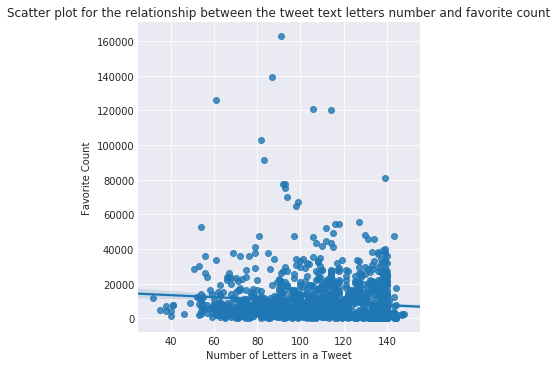

In [139]:
# setting the x and y axis values 
plot = sns.lmplot(x = 'text_letters_num', y = 'favorite_count', data = master_df )
# add approptiate labels and title for the scatter plot
plot = plot.set(ylabel= 'Favorite Count', xlabel='Number of Letters in a Tweet', title ='Scatter plot for the relationship between the tweet text letters number and favorite count')

In [140]:
# calculating the correlation coefficient between the number of letters in a tweet and the favorite count of the tweet
master_df['text_letters_num'].corr(master_df['favorite_count'])

-0.11083863911332734

#### Observation : 

I can observe that the relationship between the number of letters in a tweet and the favorite count of the tweet is almost doesn't exist. I will test the retweet count of the tweet and check if there is a relationship with the number of letters in a tweet.

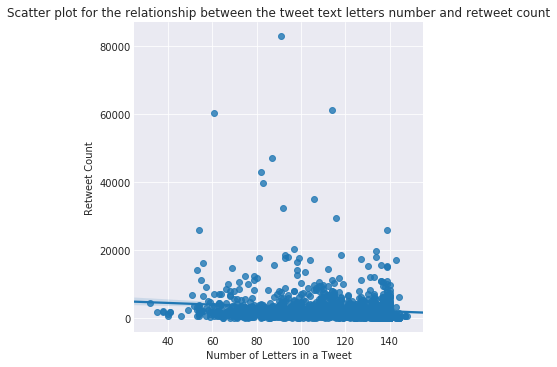

In [141]:
# setting the x and y axis values 
plot = sns.lmplot(x = 'text_letters_num', y = 'retweet_count', data = master_df )
# add approptiate labels and title for the scatter plot
plot = plot.set(ylabel= 'Retweet Count', xlabel='Number of Letters in a Tweet', title ='Scatter plot for the relationship between the tweet text letters number and retweet count')

In [142]:
# calculating the correlation coefficient between the number of letters in a tweet and the retweet count
master_df['text_letters_num'].corr(master_df['retweet_count'])

-0.12833400504489664

#### Observation : 

I can notice that also there is almost no relationship between the number of letters and the retweet count.

In [143]:
# finding the top four dog names that are popular
master_df['dog_name'].value_counts().sort_values(ascending=False)

Charlie     10
Cooper      10
Oliver      10
Lucy        10
Tucker       9
Penny        9
Winston      8
Sadie        8
Daisy        7
Lola         7
Toby         7
Lilly        7
Koda         6
Stanley      6
Bella        6
Bo           6
Jax          6
Bailey       5
Leo          5
Chester      5
Alfie        5
Milo         5
Ellie        5
Rusty        5
Scout        5
Dave         5
Buddy        5
Oscar        5
Louis        5
Oakley       4
            ..
Jaycob       1
Arlo         1
Ralpher      1
Tycho        1
Lulu         1
Jeffrie      1
Zara         1
Oreo         1
Amélie       1
Millie       1
Kota         1
Perry        1
Nugget       1
Acro         1
Beemo        1
Tupawc       1
Tug          1
Chompsky     1
Leela        1
Marq         1
Kuyu         1
Lilah        1
Lucia        1
Simba        1
Ziva         1
Dook         1
Jessifer     1
Cuddles      1
Tilly        1
Furzey       1
Name: dog_name, Length: 904, dtype: int64

#### Observation : 

The top four popular dog names are : Oliver, Lucy, Charlie, and Cooper. 
I also noticed that generally the dog names are unique among the dogs that are in the data set.

In [144]:
# checking the average rating for each dog stage
master_df.groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo      11.888889
floofer    11.875000
pupper     10.634146
puppo      12.043478
Name: rating_numerator, dtype: float64

#### Observation :

I can observe that the puppo stage has the highest average rating among other dog stages.

Text(0.5,1,'Number of tweets in each month')

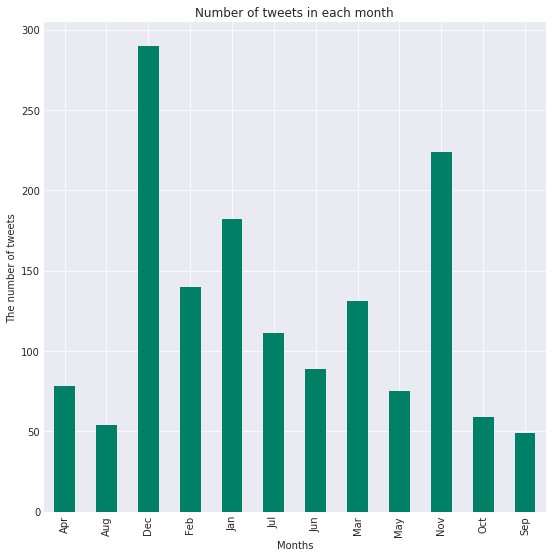

In [146]:
# checking the number of tweets in each month 
tweets_in_month = master_df.groupby('tweet_month')['tweet_id'].count()
fig, ax = plt.subplots(figsize=(9,9))
tweets_in_month.plot(ax=ax,kind="bar",colormap='summer')
ax.set_xlabel('Months')
ax.set_ylabel('The number of tweets')
ax.set_title('Number of tweets in each month')


#### Observation :

I can observe that the top three months that have the highest number of tweets are December, November, and January.

In [5]:
# finding the favorite count for each dog name
master_df.groupby('dog_name')['favorite_count'].sum().sort_values(ascending=False)

dog_name
Bo            177250
Zoey          136506
Stephan       125767
Jamesy        120882
Lilly         119847
Lucy          105019
Charlie       103490
Duddles       103108
Penny          97909
Stanley        94652
Gary           93292
Earl           90359
Bella          88243
Phil           86906
Alfie          86809
Sunny          85161
Dexter         79576
Aja            77712
Kenneth        77478
Walter         76045
Winston        73791
Buddy          73756
Tucker         73673
Oliver         71807
Boomer         68536
Dave           68100
Canela         67134
Kevin          67104
Cooper         65924
Leo            63880
               ...  
Octaviath        379
Anthony          376
Saydee           370
Ronduh           369
Dook             366
Josep            346
Raphael          333
Cherokee         330
Sam              329
Clybe            329
Chuk             328
Lambeau          321
Timofy           320
Julio            304
Leroi            283
Kohl             254
Brad

#### Observation :

I can notice that the top dog names that got the highest favourite count are :

* Bo            177250
* Zoey          136506
* Stephan       125767
* Jamesy        120882
* Lilly         119847
* Lucy          105019
* Charlie       103490
* Duddles       103108
* Penny          97909
* Stanley        94652

Charlie, Lucy, Penny, Lilly, and Stanely were some of the names that are popular among dogs names.